### Portfolio of multiple stocks

It's a set of allocations in a variety of securities.
For example:
- 20 % in APPL
- 30 % in FB
- 50 % in GOOG

We have some statistics over portfolio:
- *Daily Returns*: % returned from 1 day to the next 
- *Cumulative Return*: The amount returned after an entire time period.
- *Average Daily Return*: Mean of Daily Returns
- *Std. Daily Return*: Std. Deviation of Daily Returns

Fluctuation are linked to risk. The *Sharp Ratio* is a measure for calculating risk-adjusted return. 
It's given by *SR=(Rp - Rf)/Sigma_p* where:
- *Rp* is the expected portfolio return
- *Rf* is the risk free return, that is the return you would receive if you put your money in an investment such as a bank savings account, Bonds, etc. These returns are actually very close to 0% so we approximate Rf as 0.
- *Sigma p* is the portfolio standard deviation

The annualized SR can be obtained by multiplying against a factor K based on you sampling rate:
- Daily: K = sqrt(252)
- Weekly: K=sqrt(52)
- Monthly: K=sqrt(12)

So that you just calculate ASR = K * SR

### Implementation in python

In [1]:
import pandas as pd
import quandl

In [2]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

In [3]:
aapl = quandl.get('WIKI/AAPL.11', start_date=start, end_date=end)
cisco = quandl.get('WIKI/CSCO.11', start_date=start, end_date=end)
ibm = quandl.get('WIKI/IBM.11', start_date=start, end_date=end)
amzn = quandl.get('WIKI/AMZN.11', start_date=start, end_date=end)

In [4]:
aapl

,Adj. Close
Date,
2012-01-03,52.848787
2012-01-04,53.132802
2012-01-05,53.722681
2012-01-06,54.284287
2012-01-09,54.198183
2012-01-10,54.392239
2012-01-11,54.303564
2012-01-12,54.154488
2012-01-13,53.951436


In [5]:
aapl.iloc[0]

Adj. Close    52.848787
Name: 2012-01-03 00:00:00, dtype: float64

In [6]:
for stock_df in (aapl, cisco, ibm, amzn):
    stock_df['Normed Return'] = stock_df['Adj. Close'] / stock_df.iloc[0]['Adj. Close']

In [7]:
aapl.head()

,Adj. Close,Normed Return
Date,,
2012-01-03,52.848787,1.000000
2012-01-04,53.132802,1.005374
2012-01-05,53.722681,1.016536
2012-01-06,54.284287,1.027162
2012-01-09,54.198183,1.025533


In [8]:
aapl.tail()

,Adj. Close,Normed Return
Date,,
2016-12-23,115.080808,2.177549
2016-12-27,115.811668,2.191378
2016-12-28,115.317843,2.182034
2016-12-29,115.288214,2.181473
2016-12-30,114.389454,2.164467


In [9]:
# 30% in aapl
# 20% in cisco
# 40% in amazon
# 10% in ibm
for stock_df, allocation in zip((aapl, cisco, ibm, amzn), [.3, .2, .4, .1]):
    stock_df['Allocation'] = stock_df['Normed Return'] * allocation

In [10]:
aapl.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2012-01-03,52.848787,1.000000,0.300000
2012-01-04,53.132802,1.005374,0.301612
2012-01-05,53.722681,1.016536,0.304961
2012-01-06,54.284287,1.027162,0.308149
2012-01-09,54.198183,1.025533,0.307660


In [11]:
for stock_df in (aapl, cisco, ibm, amzn):
    # 1000000 dollars
    stock_df['Position Values'] = stock_df['Allocation'] * 1000000

In [12]:
aapl.head()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2012-01-03,52.848787,1.000000,0.300000,300000.000000
2012-01-04,53.132802,1.005374,0.301612,301612.236461
2012-01-05,53.722681,1.016536,0.304961,304960.727573
2012-01-06,54.284287,1.027162,0.308149,308148.724558
2012-01-09,54.198183,1.025533,0.307660,307659.946988


In [15]:
all_position_vals = [aapl['Position Values'],
                    cisco['Position Values'],
                    ibm['Position Values'],
                    amzn['Position Values']]
portfolio_val = pd.concat(all_position_vals, axis=1)

In [17]:
portfolio_val.columns = ['AAPL Position',
                        'CISCO Position',
                        'IBM Position',
                        'AMAZON Position']
portfolio_val.head()

,AAPL Position,CISCO Position,IBM Position,AMAZON Position
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166


In [18]:
portfolio_val.tail()

,AAPL Position,CISCO Position,IBM Position,AMAZON Position
Date,,,,
2016-12-23,653264.617079,377469.015679,407359.955612,424839.412389
2016-12-27,657413.396830,379323.596496,408410.671112,430877.506563
2016-12-28,654610.167268,376108.989746,406089.322915,431285.259454
2016-12-29,654441.973495,376603.544631,407091.167926,427386.471541
2016-12-30,649340.095692,373636.215323,405600.618032,418851.589119


In [19]:
portfolio_val['Total Position'] = portfolio_val.sum(axis=1)

In [20]:
portfolio_val.head()

,AAPL Position,CISCO Position,IBM Position,AMAZON Position,Total Position
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

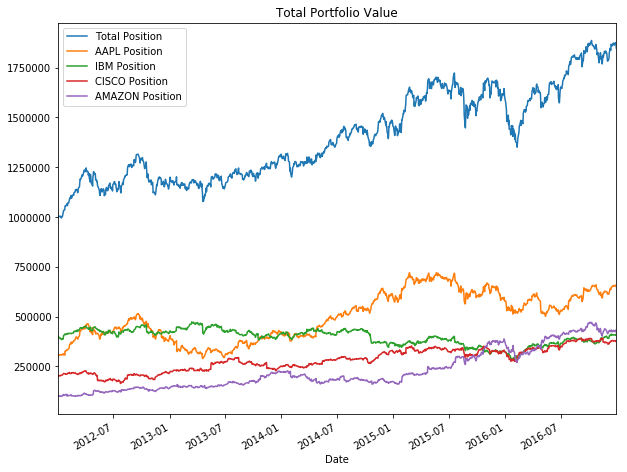

In [25]:
portfolio_val[['Total Position', 'AAPL Position', 'IBM Position', 'CISCO Position', 'AMAZON Position']].plot(figsize=(10,8))
plt.title('Total Portfolio Value')